<a href="https://colab.research.google.com/github/aa2314/3rd-year-2nd-year-/blob/main/03_Exercise_Notebook_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

In this exercise, you will analyse a dataset obtained from the London transport system (TfL). The data is in a filled called `tfl_readership.csv` (comma-separated-values format).  As in Exercise 2, we will load and view the data using  `pandas`.

In [ ]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Load data
df_tfl = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IB-Data-Science-master/Exercises/tfl_ridership.csv')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/tfl_ridership.csv'

df_tfl.head(13)

,Year,Period,Start,End,Days,Bus cash (000s),Bus Oyster PAYG (000s),Bus Contactless (000s),Bus One Day Bus Pass (000s),Bus Day Travelcard (000s),...,Tube Contactless (000s),Tube Day Travelcard (000s),Tube Season Travelcard (000s),Tube Other incl free (000s),Tube Total (000s),TfL Rail (000s),Overground (000s),DLR (000s),Tram (000s),Air Line (000s)
0,2000/01,P 01,01 Apr '00,29 Apr '00,29d,884,0,0,210,231,...,0,655,1066,200,2509,0,0,96,45.8,0.0
1,2000/01,P 02,30 Apr '00,27 May '00,28d,949,0,0,214,205,...,0,605,1168,217,2598,0,0,93,46.5,0.0
2,2000/01,P 03,28 May '00,24 Jun '00,28d,945,0,0,209,221,...,0,650,1154,212,2623,0,0,98,47.1,0.0
3,2000/01,P 04,25 Jun '00,22 Jul '00,28d,981,0,0,216,241,...,0,708,1196,214,2761,0,0,105,50.8,0.0
4,2000/01,P 05,23 Jul '00,19 Aug '00,28d,958,0,0,225,248,...,0,730,1165,165,2643,0,0,103,50.3,0.0
5,2000/01,P 06,20 Aug '00,16 Sep '00,28d,984,0,0,243,236,...,0,702,1164,151,2608,0,0,100,49.2,0.0
6,2000/01,P 07,17 Sep '00,14 Oct '00,28d,1001,0,0,205,216,...,0,639,1286,196,2763,0,0,107,48.8,0.0
7,2000/01,P 08,15 Oct '00,11 Nov '00,28d,979,0,0,199,221,...,0,668,1298,220,2819,0,0,113,51.5,0.0
8,2000/01,P 09,12 Nov '00,09 Dec '00,28d,971,0,0,184,212,...,0,640,1302,242,2839,0,0,114,54.0,0.0
9,2000/01,P 10,10 Dec '00,06 Jan '01,28d,912,0,0,192,211,...,0,631,993,195,2359,0,0,90,55.3,0.0


Each row of our data frame represents the average daily ridership over a 28/29 day period for various types of transport and tickets (bus, tube etc.).  We have used the `.head()` command to display the top 13 rows of the data frame (corresponding to one year).  Focusing on the "Tube Total" column, notice the dip in ridership in row 9 (presumably due to Christmas/New Year's), and also the slight dip during the summer (rows 4,5).

In [ ]:
#df_tfl.sample(3)  #random sample of 3 rows
df_tfl.tail(3)  #last 3 rows

,Year,Period,Start,End,Days,Bus cash (000s),Bus Oyster PAYG (000s),Bus Contactless (000s),Bus One Day Bus Pass (000s),Bus Day Travelcard (000s),...,Tube Contactless (000s),Tube Day Travelcard (000s),Tube Season Travelcard (000s),Tube Other incl free (000s),Tube Total (000s),TfL Rail (000s),Overground (000s),DLR (000s),Tram (000s),Air Line (000s)
242,2018/19,P 09,11 Nov '18,08 Dec '18,28d,0,1110,1089,0,41,...,1399,249,1017,334,4221,996,557,355,84.1,2.6
243,2018/19,P 10,09 Dec '18,05 Jan '19,28d,0,1001,949,0,38,...,1110,242,632,259,3279,750,414,270,66.3,3.2
244,2018/19,P 11,06 Jan '19,02 Feb '19,28d,0,1036,1075,0,30,...,1310,204,924,305,3809,929,517,333,79.3,2.3


The dataframe contains $N=245$ counting periods (of 28/29 days each) from 1 April 2000 to  2 Feb 2019. We now define a numpy array consisting of the values in the ' Tube Total (000s)' column:

In [ ]:
yvals = np.array(df_tfl['Tube Total (000s)'])
N = np.size(yvals)
xvals = np.linspace(1,N,N) #an array containing the values 1,2....,N

We now have a time series consisting of points $(x_i,y_i)$, for $i = 1, \ldots, N$, where $y_i$ is the average daily tube rideship in counting period $x_i = i$.

## 2a) Plot the data in a scatterplot

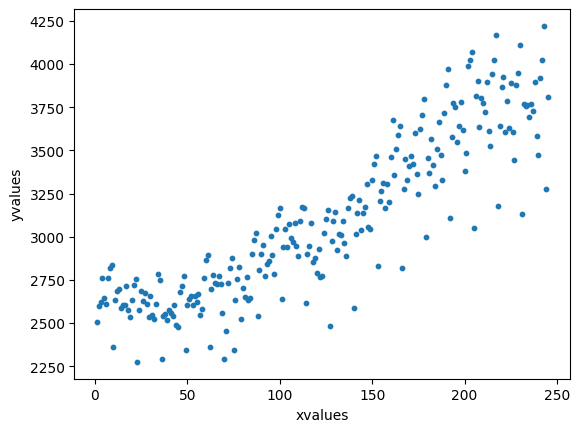

In [ ]:
#Your code for scatterplot here
plt.scatter(xvals, yvals, s=10)
plt.xlabel('xvalues')
plt.ylabel('yvalues')
plt.show()


## 2b) Fit a linear model $f(x) = \beta_0 + \beta_1 x$ to the data

- Print the values of the regression coefficients $\beta_0, \beta_1$ determined using least-squares.
- Plot the fitted model and the scatterplot on the same plot.
- Compute and print the **MSE** and the $R^2$ coefficient for the fitted model.

All numerical outputs should be displayed to three decimal places.

beta_0 = 2522.8977462838166 , beta_1 = 2.1567932162155863


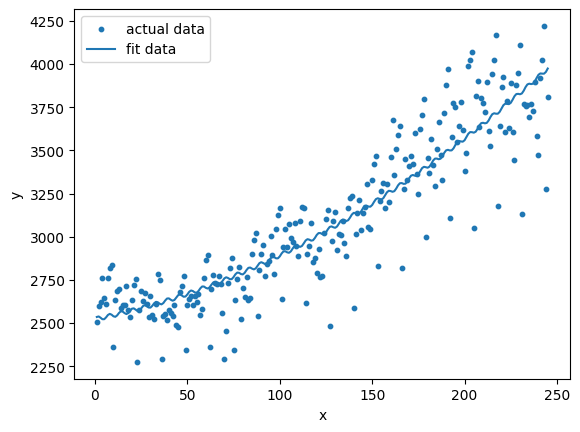

MSE = 40511.76714477568 , R^2 =  0.8173106393219


In [ ]:
#Your code here
all_ones = np.ones(N)
X = np.column_stack((all_ones, xvals, xvals**2, np.sin(xvals)))
#XT = np.transpose(X)
beta = np.linalg.lstsq(X, yvals, rcond =None)[0]
print("beta_0 =", beta[0],",", "beta_1 =", beta[1])
fit = X.dot(beta)
fit_0 = np.mean(yvals) * all_ones
plt.scatter(xvals, yvals, s=10, label="actual data")
plt.plot(xvals, fit, label ="fit data")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()
residual = yvals - fit
residual_0 = yvals - fit_0
#residual = residual + residual_0
SSE = np.linalg.norm(residual) **2
SSE_0 = np.linalg.norm(residual_0) **2
MSE = SSE/N
R_sq = 1 - SSE/SSE_0
print("MSE =", MSE,",", "R^2 = ",R_sq)

## 2c)  Plotting the residuals

- Plot the residuals on a scatterplot
- Also plot the residuals over a short duration and comment on whether you can discern any periodic components.

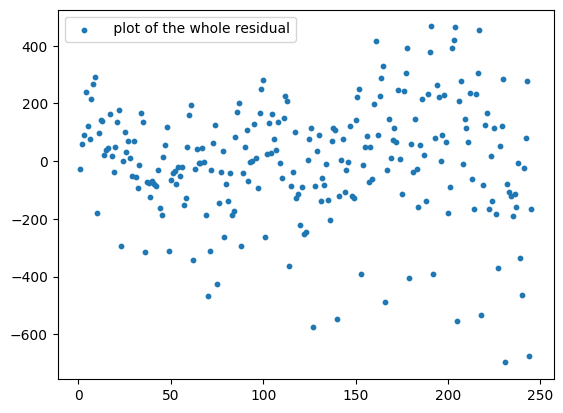

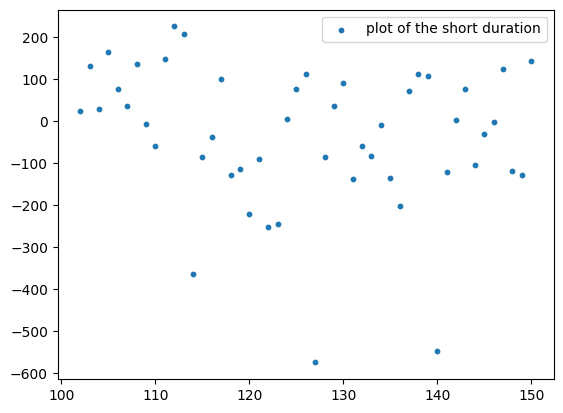

In [ ]:
# Your code here
plt.scatter(xvals, residual, s=10,label = " plot of the whole residual")
plt.legend()
plt.show()
plt.scatter(xvals[101:150], residual[101:150], s=10, label= "plot of the short duration")
plt.legend()
plt.show()

< Comment on periodic components here >
The graph is showing a sinusoidal behaviour, however the amplitude of the possible sinusoidal function os very low, hence it will look like a horizontal line. One sine and one cosine will do as the frequency seems consistent.

## 2d) Periodogram

- Compute and plot the peridogram of the residuals. (Recall that the periodogram is the squared-magnitude of the DFT coefficients.)
- Identify the indices/frequencies for which the periogram value exceeds **50%** of the maximum.


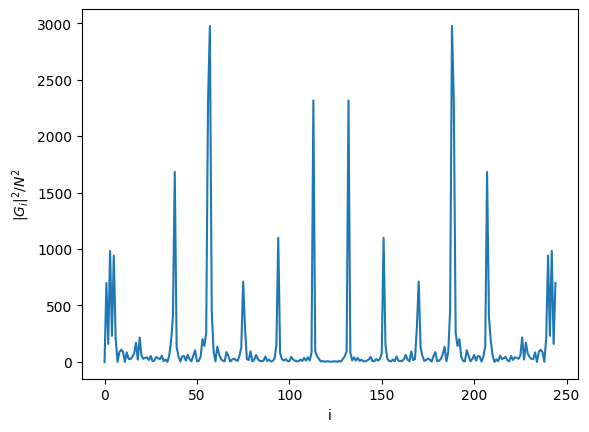

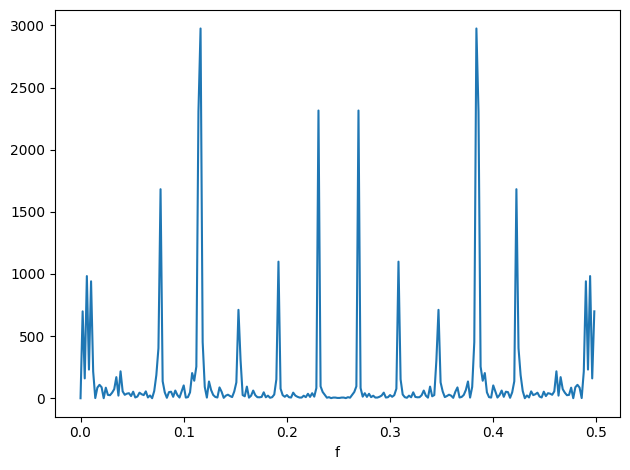

In [ ]:
# Your code to compute and plot the histogram(did uou mean periodogram?)
T = xvals[102] - xvals[100]
dft = np.fft.fft(residual, n=None, axis=-1, norm=None)/N

pgram = (np.abs(dft)) ** 2
i = np.linspace(0, (N-1), N)
f = i/(N * T)
w = 2 * math.pi * f
plt.plot(i , pgram)
plt.xlabel('i')
plt.ylabel('$|G_i|^2/N^2$')
plt.show()
plt.plot(f, pgram)
plt.xlabel("f")
plt.tight_layout()
plt.show()

In [ ]:
# Your code to identify the indices for which the periodogram value exceeds 50% of the maximum
maximum = np.max(pgram)
maximum = maximum/2 # this is 50% of maximum
print(maximum)
index = []
f_top = []
w_top = []
for i in range(len(pgram)):
  if pgram[i] > maximum:
    f_top.append(f[i])
    index.append(i)
    w_top.append(w[i])
  else:
    pass
print((index))
print(f_top)
print(w_top)



1487.6469416975942
[38, 56, 57, 113, 132, 188, 189, 207]
[0.07755102040816327, 0.11428571428571428, 0.11632653061224489, 0.23061224489795917, 0.2693877551020408, 0.3836734693877551, 0.38571428571428573, 0.42244897959183675]
[0.48726743198535566, 0.7180783208205241, 0.7309011479780334, 1.4489794687985575, 1.6926131847912356, 2.4106915056117595, 2.423514332769269, 2.6543252216044375]


## 2e) To the residuals,  fit a model of the form  

$$ \beta_{1s} \sin(\omega_1 x) + \beta_{1c} \cos(\omega_1 x) + \beta_{2s} \sin(\omega_2 x) + \beta_{2c} \cos(\omega_2 x) + \ldots + \beta_{Ks} \sin(\omega_K x) + \beta_{Kc} \cos(\omega_K x).$$

The frequencies $\omega_1, \ldots, \omega_K$ in the model are those corresponding to the indices identified in Part 2c. (Hint: Each of the sines and cosines will correspond to one column in your X-matrix.)

- Print the values of the regression coefficients obtained using least-squares.
- Compute and print the final **MSE** and $R^2$ coefficient. Comment on the improvement over the linear fit.

All numerical outputs should be displayed to three decimal places.

In [ ]:
# Your code here
X_f = all_ones
k = 0
count = 1
for w in w_top:
  if count ==1:
    sin = np.sin(w*xvals)
    X_f = np.c_[X_f, sin]
    count = 0
  else:
    cos = np.cos(w*xvals)
    X_f = np.c_[X_f, cos]
  count = 1
beta_f = np.linalg.lstsq(X_f, residual, rcond = None)[0]
fit_f = X_f.dot(beta_f)
print(" beta sinusoidal values are :", np.round(beta_f,3))
fit_f_0 = np.mean(residual) * all_ones
SSE_f_0 = np.linalg.norm(yvals - fit_f_0) ** 2
SSE_f = np.linalg.norm(yvals - fit_f) ** 2
MSE_f = SSE_f/N
R_sq_f = 1 - SSE_f/SSE_f_0
print("MSE =",np.round(MSE_f,3), ",", "R^2 =", np.round(R_sq_f,3))

 beta sinusoidal values are : [   0.856  -20.643    0.395  -15.711 -136.836   15.845   62.622  -37.711
    0.497]
MSE = 9806098.898 , R^2 = 0.001


## 2f) The combined fit
- Plot the combined fit together with a scatterplot of the data
- Compute and print the final **MSE** and $R^2$ coefficient. Comment on the improvement over the linear fit.

The combined fit, which corresponds to the full model

$$
f(x) = \beta_0 + \beta_1 x + \beta_{s1} \sin(\omega_1 x) + \beta_{c1} \cos(\omega_1 x) + \ldots + \beta_{sk} \sin(\omega_k x) + \beta_{ck} \cos(\omega_k x),
$$

can be obtained by adding the fits in parts 2b) and 2e).

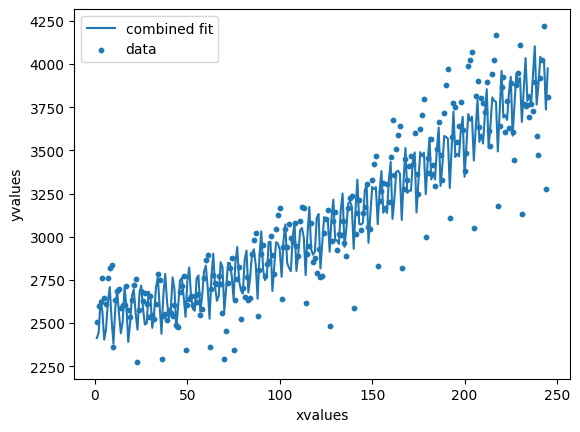

MSE = 28016.43084273444 , R^2 = 0.8736588354477298


In [ ]:
# Your code here
fit_comb = fit + fit_f
plt.plot(xvals, fit_comb, label = 'combined fit')
plt.scatter(xvals, yvals, s=10,label = 'data')
plt.xlabel("xvalues")
plt.ylabel("yvalues")
plt.legend()
plt.show()
SSE_comb = np.linalg.norm(yvals - fit_comb) ** 2
R_sq_comb = 1 -SSE_comb/SSE_0
print("MSE =", SSE_comb/N, ",", "R^2 =", R_sq_comb)

< Add comment on the improvement over the linear fit. >
I am not certain but perhaps we can model this with quadratic fit( i.e. adding x^2 term). Overall though, the r squared values seems to be close to 1. hence it is a more accurate fit than just linear fit, thsnks to dft used for the residuals.